In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import yt

from galaxy_analysis.gizmo import yield_model
from galaxy_analysis.utilities import cy_convert_abundances as ca
#from galaxy_analysis.utilities import convert_abundances as ca
from galaxy_analysis.plot.plot_styles import *

import gizmo_analysis as gizmo
import utilities as gizmo_ut



from scipy.stats import ks_2samp

In [7]:
wdir = "/home/aemerick/work/gizmo_runs/m12q_res5700_test/"

part = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', 60,
                                    assign_host_principal_axes=False, simulation_directory = wdir)
part190 = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', 190,
                                    assign_host_principal_axes=False, simulation_directory = wdir)

print(part.host_positions)


# in utilities.simulation.Snapshot():
* reading:  home/aemerick/work/gizmo_runs/m12q_res5700_test/snapshot_times.txt

  using snapshot index = 60, redshift = 5.429



OSError: cannot find snapshot index = 60 in:  ['/home/aemerick/work/gizmo_runs/m12q_res5700_test/output/snapshot_000.hdf5', '/home/aemerick/work/gizmo_runs/m12q_res5700_test/output/snapshot_039.hdf5', '/home/aemerick/work/gizmo_runs/m12q_res5700_test/output/snapshot_190.hdf5', '/home/aemerick/work/gizmo_runs/m12q_res5700_test/output/snapshot_600.hdf5']

(-5, 4)

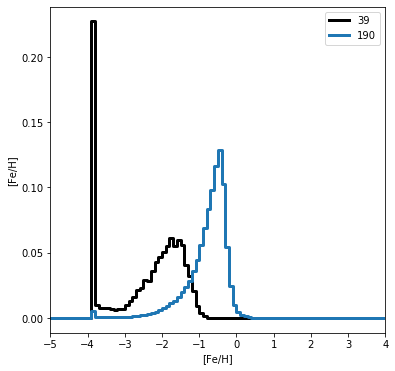

In [6]:
ex1,ex2 = 'Fe','H'
ey1,ey2 = 'Fe','H'


x1 = part['star'].prop('massfraction.' + str.lower(ex1)).astype(np.double)
x2 = part['star'].prop('massfraction.' + str.lower(ex2)).astype(np.double)
y1 = part190['star'].prop('massfraction.' + str.lower(ey1)).astype(np.double)
y2 = part190['star'].prop('massfraction.' + str.lower(ey2)).astype(np.double)

x  = ca.abundance_ratio_array(ex1, x1, ex2, x2, input_type="mass")
y  = ca.abundance_ratio_array(ey1, y1, ey2, y2, input_type="mass")

abund = x*1.0

dbin  = 0.1
rmin  = -5
rmax  = 4

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

nbins = int((rmax - rmin)/dbin)
hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
hist2 = np.ones(np.size(hist)+1)
hist2[:-1] = hist
hist2[-1] = hist2[-2]


ax.step(bins, hist2/(1.0*np.sum(hist2)), where = 'post', lw = 3, color = 'black', label='39')

abund = y*1.0

nbins = int((rmax - rmin)/dbin)
hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
hist2 = np.ones(np.size(hist)+1)
hist2[:-1] = hist
hist2[-1] = hist2[-2]

ax.step(bins, hist2/(1.0*np.sum(hist2)), where = 'post', color = 'C0', lw = 3, label='190')

#ax.scatter(x,y)

ax.legend(loc='best')
ax.set_xlabel('[' + ex1 + '/' + ex2 + ']')
ax.set_ylabel('[' + ey1 + '/' + ey2 + ']')

ax.set_xlim(rmin,rmax)

In [9]:
wdir = "/home/aemerick/work/gizmo_runs/m12q_res5700_noage/"
part = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', 60,
                                    assign_host_principal_axes=False, simulation_directory = wdir)
wdir = "/home/aemerick/work/gizmo_runs/m12q_res5700_original/"
part190 = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', 60,
                                    assign_host_principal_axes=False, simulation_directory = wdir)

print(part.host_positions)


# in utilities.simulation.Snapshot():
* reading:  home/aemerick/work/gizmo_runs/m12q_res5700_noage/snapshot_times.txt

  using snapshot index = 60, redshift = 5.429


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  home/aemerick/work/gizmo_runs/m12q_res5700_noage/output/snapshot_060.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 16220880 particles
    dark2     (id = 2): 4132251 particles
    gas       (id = 0): 15526126 particles
    star      (id = 4): 694752 particles
    blackhole (id = 5): 0 particles

* reading species: ['star', 'dark']
* reading particles from:
    home/aemerick/work/gizmo_runs/m12q_res5700_noage/output/snapshot_060.hdf5

! cannot find MUSIC config file:  home/aemerick/work/gizmo_runs/m12q_res5700_noage/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle properties

*

In [14]:
x1 = part['star'].prop('massfraction.' + str.lower(ex1)).astype(np.double)

print(np.min(x1),np.max(x1))

1.7300000365594315e-07 0.009390188381075859


(-5, 4)

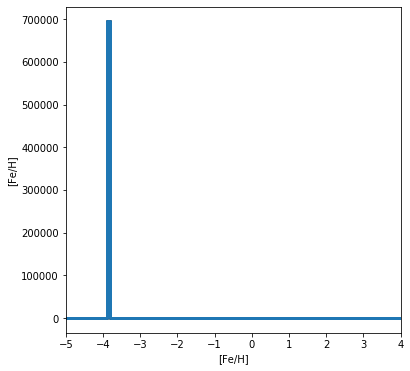

In [10]:
ex1,ex2 = 'Fe','H'
ey1,ey2 = 'Fe','H'


x1 = part['star'].prop('massfraction.' + str.lower(ex1)).astype(np.double)
x2 = part['star'].prop('massfraction.' + str.lower(ex2)).astype(np.double)
y1 = part190['star'].prop('massfraction.' + str.lower(ey1)).astype(np.double)
y2 = part190['star'].prop('massfraction.' + str.lower(ey2)).astype(np.double)

x  = ca.abundance_ratio_array(ex1, x1, ex2, x2, input_type="mass")
y  = ca.abundance_ratio_array(ey1, y1, ey2, y2, input_type="mass")

abund = x*1.0

dbin  = 0.1
rmin  = -5
rmax  = 4

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

nbins = int((rmax - rmin)/dbin)
hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
hist2 = np.ones(np.size(hist)+1)
hist2[:-1] = hist
hist2[-1] = hist2[-2]


ax.step(bins, hist2, where = 'post', lw = 3, color = 'black', label = 'tip')

abund = y*1.0

nbins = int((rmax - rmin)/dbin)
hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
hist2 = np.ones(np.size(hist)+1)
hist2[:-1] = hist
hist2[-1] = hist2[-2]

ax.step(bins, hist2, where = 'post', color = 'C0', lw = 3, label = 'correct')

#ax.scatter(x,y)


ax.set_xlabel('[' + ex1 + '/' + ex2 + ']')
ax.set_ylabel('[' + ey1 + '/' + ey2 + ']')

ax.set_xlim(rmin,rmax)


# in utilities.simulation.Snapshot():
* reading:  home/aemerick/work/gizmo_runs/m12q_res5700_original/snapshot_times.txt

  using snapshot index = 190, redshift = 1.763


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  home/aemerick/work/gizmo_runs/m12q_res5700_original/output/snapshot_190.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 16220880 particles
    dark2     (id = 2): 4132251 particles
    gas       (id = 0): 15501044 particles
    star      (id = 4): 722209 particles
    blackhole (id = 5): 0 particles

* reading species: ['star', 'dark']
* reading particles from:
    home/aemerick/work/gizmo_runs/m12q_res5700_original/output/snapshot_190.hdf5

! cannot find MUSIC config file:  home/aemerick/work/gizmo_runs/m12q_res5700_original/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle 

(-5, 4)

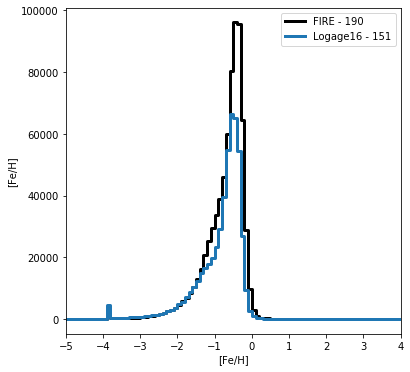

In [4]:
wdir = "/home/aemerick/work/gizmo_runs/m12q_res5700_original/"
part = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', 190,
                                    assign_host_principal_axes=False, simulation_directory = wdir)
wdir = "/home/aemerick/work/gizmo_runs/m12q_res5700_logage/"
part190 = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', 151,
                                    assign_host_principal_axes=False, simulation_directory = wdir)

print(part.host_positions)
ex1,ex2 = 'Fe','H'
ey1,ey2 = 'Fe','H'


x1 = part['star'].prop('massfraction.' + str.lower(ex1)).astype(np.double)
x2 = part['star'].prop('massfraction.' + str.lower(ex2)).astype(np.double)
y1 = part190['star'].prop('massfraction.' + str.lower(ey1)).astype(np.double)
y2 = part190['star'].prop('massfraction.' + str.lower(ey2)).astype(np.double)

x  = ca.abundance_ratio_array(ex1, x1, ex2, x2, input_type="mass")
y  = ca.abundance_ratio_array(ey1, y1, ey2, y2, input_type="mass")

abund = x*1.0

dbin  = 0.1
rmin  = -5
rmax  = 4

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

nbins = int((rmax - rmin)/dbin)
hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
hist2 = np.ones(np.size(hist)+1)
hist2[:-1] = hist
hist2[-1] = hist2[-2]


ax.step(bins, hist2, where = 'post', lw = 3, color = 'black', label = 'FIRE - 190')

abund = y*1.0

nbins = int((rmax - rmin)/dbin)
hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
hist2 = np.ones(np.size(hist)+1)
hist2[:-1] = hist
hist2[-1] = hist2[-2]

ax.step(bins, hist2, where = 'post', color = 'C0', lw = 3, label = 'Logage16 - 151')

#ax.scatter(x,y)

ax.legend(loc='best')

ax.set_xlabel('[' + ex1 + '/' + ex2 + ']')
ax.set_ylabel('[' + ey1 + '/' + ey2 + ']')

ax.set_xlim(rmin,rmax)


# in utilities.simulation.Snapshot():
* reading:  home/aemerick/work/gizmo_runs/m12q_res5700_noage/snapshot_times.txt

  using snapshot index = 39, redshift = 7.229


# in gizmo_analysis.gizmo_io.Read():
* reading header from:  home/aemerick/work/gizmo_runs/m12q_res5700_noage/output/snapshot_039.hdf5
  snapshot contains the following number of particles:
    dark      (id = 1): 16220880 particles
    dark2     (id = 2): 4132251 particles
    gas       (id = 0): 15887336 particles
    star      (id = 4): 333543 particles
    blackhole (id = 5): 0 particles

* reading species: ['star', 'dark']
* reading particles from:
    home/aemerick/work/gizmo_runs/m12q_res5700_noage/output/snapshot_039.hdf5

! cannot find MUSIC config file:  home/aemerick/work/gizmo_runs/m12q_res5700_noage/*/*.conf
! missing cosmological parameters, assuming the following (from AGORA box):
  assuming omega_baryon = 0.0455
  assuming sigma_8 = 0.807
  assuming n_s = 0.961

* checking sanity of particle properties

*

(-5, 4)

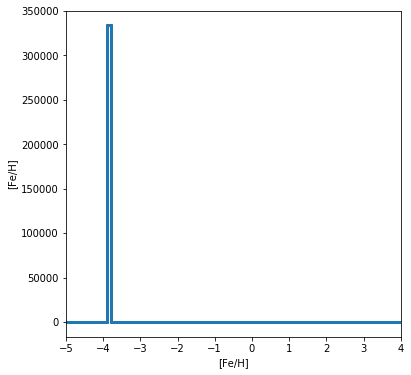

In [2]:
wdir = "/home/aemerick/work/gizmo_runs/m12q_res5700_noage/"
part = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', 39,
                                    assign_host_principal_axes=False, simulation_directory = wdir)
part190 = gizmo.io.Read.read_snapshots(['star', 'dark'], 'index', 39,
                                    assign_host_principal_axes=False, simulation_directory = wdir)

print(part.host_positions)
ex1,ex2 = 'Fe','H'
ey1,ey2 = 'Fe','H'


x1 = part['star'].prop('massfraction.' + str.lower(ex1)).astype(np.double)
x2 = part['star'].prop('massfraction.' + str.lower(ex2)).astype(np.double)
y1 = part190['star'].prop('massfraction.' + str.lower(ey1)).astype(np.double)
y2 = part190['star'].prop('massfraction.' + str.lower(ey2)).astype(np.double)

x  = ca.abundance_ratio_array(ex1, x1, ex2, x2, input_type="mass")
y  = ca.abundance_ratio_array(ey1, y1, ey2, y2, input_type="mass")

abund = x*1.0

dbin  = 0.1
rmin  = -5
rmax  = 4

fig, ax = plt.subplots()
fig.set_size_inches(6,6)

nbins = int((rmax - rmin)/dbin)
hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
hist2 = np.ones(np.size(hist)+1)
hist2[:-1] = hist
hist2[-1] = hist2[-2]


ax.step(bins, hist2, where = 'post', lw = 3, color = 'black')

abund = y*1.0

nbins = int((rmax - rmin)/dbin)
hist, bins = np.histogram(abund, bins = nbins, range = (rmin,rmax))
hist2 = np.ones(np.size(hist)+1)
hist2[:-1] = hist
hist2[-1] = hist2[-2]

ax.step(bins, hist2, where = 'post', color = 'C0', lw = 3)

#ax.scatter(x,y)


ax.set_xlabel('[' + ex1 + '/' + ex2 + ']')
ax.set_ylabel('[' + ey1 + '/' + ey2 + ']')

ax.set_xlim(rmin,rmax)